# Confusion Matrix Analysis and Viewing Misclassifications

In [2]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k

#prametri de instruire
batch_size = 128
epochs =1

#incarcare baza de date
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Sctocarea numerlor de randuri si coloane
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# trebuie sa formata data intr-o forma acceptata de keras
#treuie sa adugam a 4 dimensiun pentru baza de date
#schimban forma(shape) imagini originale de la (60000,28,28) la (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols,1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

#Sctocheaza forma(shape) unei singure imagini
input_shape = (img_rows, img_cols, 1)

#schimba tipul imagini catre float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizare datelor si schimbarea range de la (0 la 255) la (0 la 1)
x_train /=255
x_test /=255

#one hot ecode output
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#Sa numaram numarul de coloane din hot encoded
print("Number of Classes: " +str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels= x_train.shape[1] * x_train.shape[2]

#creare model
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(keras.optimizers.Adadelta(), 'categorical_crossentropy', ['accuracy'])

print(model.summary())

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test)
                         )

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy', score[1])


Number of Classes: 10
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (No

# Savam fisierul history

In [3]:
import pickle

pickle_out = open("MINST_history.pickle", "wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

# Incarcare history salvat este ca aceste doua lini

In [4]:
pickle_in = open("MINST_history.pickle", "rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'val_loss': [0.06624164369702339], 'val_accuracy': [0.9785000085830688], 'loss': [0.269882393125693], 'accuracy': [0.9170833]}


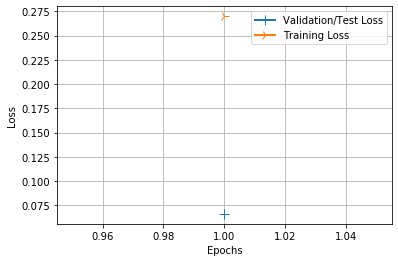

In [5]:
#Plotting grafic loss
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(loss_values)+1)

line1 = plt.plot(epochs, val_loss_values, label= 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()








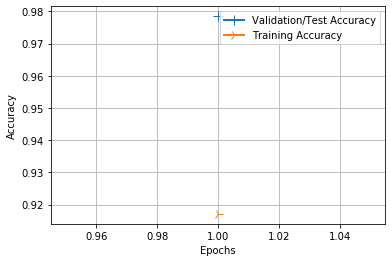

In [8]:
#plot grafic accuracy
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

line1 = plt.plot(epochs, val_acc_values, label= 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))

precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.97      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

[[ 975    1    0    0    1    0    2    1    0    0]
 [   0 1129    3    0    0    0    2    0    1    0]
 [   3    3 1016    0    3    0    1    4    2    0]
 [   1    0    7  981    0    5    0    8    7    1]
 [   0    0    2    0  969    0    6    0  

In [10]:
import cv2
import numpy as np
from keras.datasets import mnist

#incarcarea baze de date MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Foloseste numpy pentru a crea un array care stocheaza o valuarea 1 cand clasificare gresita se intampla
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result >0)

#Afiseaza indicele de clasificare grasita/misclassifications
print("Indices of misclassifed data are: \n\n" +str(result_indices))

Indices of misclassifed data are: 

(array([   8,   18,   92,  247,  259,  290,  320,  321,  340,  359,  445,
        448,  449,  495,  582,  684,  691,  717,  720,  740,  844,  947,
        965, 1014, 1039, 1062, 1068, 1112, 1114, 1226, 1232, 1242, 1247,
       1260, 1299, 1319, 1326, 1337, 1364, 1378, 1393, 1425, 1500, 1522,
       1527, 1530, 1549, 1621, 1678, 1681, 1686, 1709, 1717, 1754, 1878,
       1901, 1955, 2035, 2040, 2043, 2053, 2070, 2093, 2098, 2109, 2118,
       2129, 2135, 2182, 2189, 2272, 2280, 2293, 2369, 2380, 2387, 2406,
       2414, 2454, 2462, 2488, 2560, 2597, 2607, 2648, 2654, 2720, 2760,
       2896, 2921, 2927, 2953, 3012, 3030, 3060, 3073, 3206, 3225, 3316,
       3333, 3475, 3503, 3520, 3558, 3559, 3597, 3662, 3751, 3767, 3776,
       3778, 3780, 3806, 3808, 3836, 3838, 3850, 3855, 3869, 3893, 3906,
       3941, 4000, 4007, 4075, 4078, 4102, 4152, 4163, 4176, 4199, 4205,
       4224, 4248, 4256, 4289, 4306, 4360, 4369, 4433, 4435, 4437, 4443,
       4500, 4

# Displaying the misclassifications

In [13]:
import cv2

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2, cv2.BORDER_CONSTANT, value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250,70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,0,255),2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):
    input_im = x_test[result_indices[0][i]]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
    input_im = input_im.reshape(1, 28, 28, 1) 

    #Predictia
    res = str(model.predict_classes(input_im, 1, verbose= 0)[0])
    draw_test("Prediction", res, imageL, y_test[result_indices[0][i]])
    cv2.waitKey(0)

cv2.destroyAllWindows()